# Predicting the first Inning Score in a ODI

### TABLE OF CONTENTS
<ol type='1'>
    <li>Importing Python Libraries
    <li>Loading Dataset
    <li>Checking for NULL values
    <li>Calculating 'Average Runs' scored by each Countries and Visualizing them using Bar Graph
    <li>Analyzing the effect of individual features on target variable using Correlation
    <li>Selecting Features and Target Variables for Modelling
    <li>Perform Train-Test Split
    <li>Feature Scaling
    <li>Modelling + Prediction + Evaluation
       <ol type='a'>
           <li>Linear Regression
           <li>Decision Tree
           <li>Random Forest Regression
       </ol>
</ol>

### Step 1: Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

### Step 2: Loading the Dataset ("odi.csv")

In [2]:
df = pd.read_csv("odi.csv")
df.shape

(350899, 15)

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301


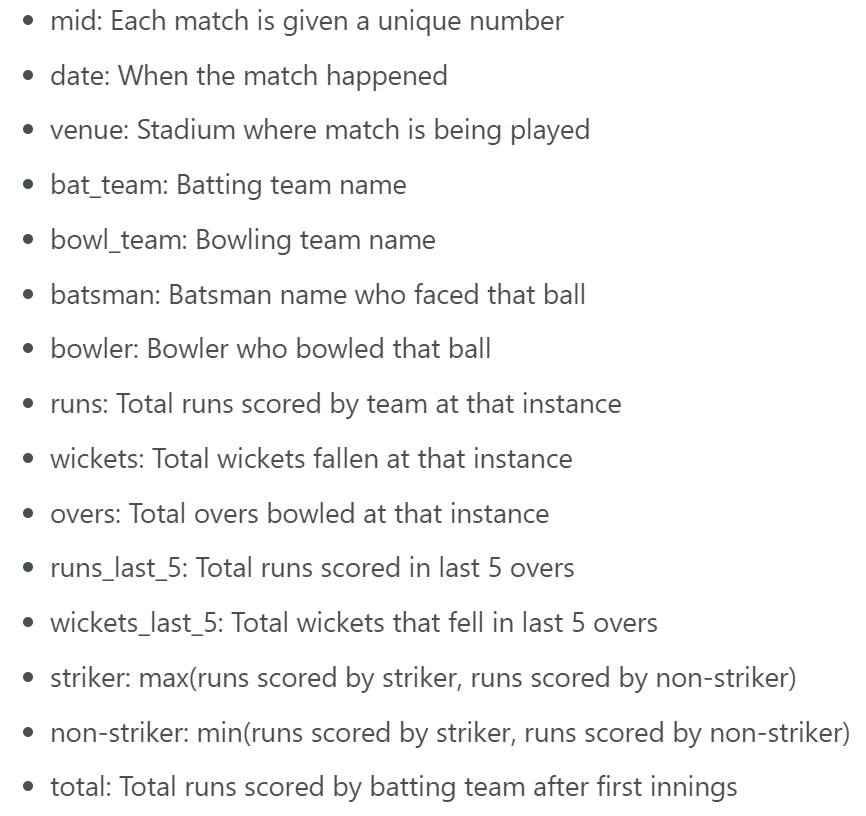

### Step 3: Checking for null values

In [4]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

##### Since there are no null values in given data set, hence no cleaning required

### Step 4: Calculating average runs, scored by each country and visualizing them using Bar Graph

In [5]:
unique_match = df[['mid','bat_team','total']].drop_duplicates(subset=['mid','bat_team','total'])
unique_match.shape

(1188, 3)

In [6]:
unique_match.head()

,mid,bat_team,total
0,1,England,301
315,2,England,271
622,3,Pakistan,235
933,4,Pakistan,154
1246,5,Sri Lanka,257


In [7]:
countries_avg_runs = unique_match.groupby('bat_team')['total'].mean()
countries_avg_runs

bat_team
Afghanistan             226.423077
Asia XI                 328.333333
Australia               272.436242
Bangladesh              226.280488
Bermuda                 188.500000
Canada                  189.111111
England                 262.357798
Hong Kong               224.500000
India                   273.401786
Ireland                 222.153846
Kenya                   173.909091
Netherlands             193.125000
New Zealand             265.702970
Pakistan                255.523810
Papua New Guinea        201.000000
Scotland                218.809524
South Africa            279.654206
Sri Lanka               250.645833
United Arab Emirates    217.285714
West Indies             231.121951
Zimbabwe                200.346667
Name: total, dtype: float64

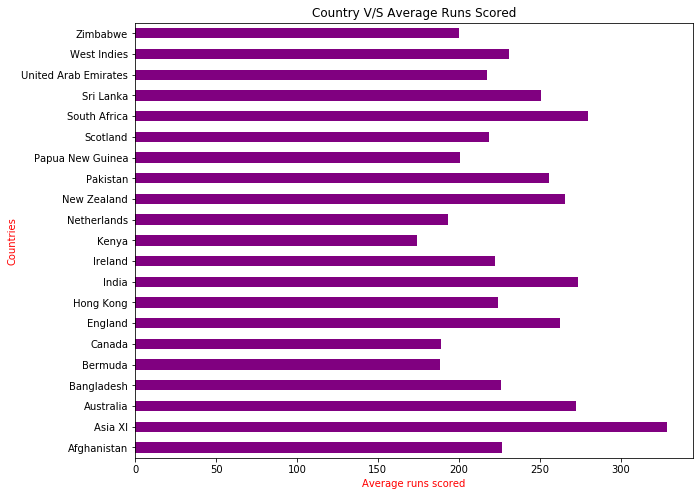

In [8]:
countries_avg_runs.plot(kind='barh', figsize=(10,8), color='purple')
plt.title('Country V/S Average Runs Scored')
plt.xlabel('Average runs scored', color='red')
plt.ylabel('Countries', color='red')
plt.show()

### Step 5: Analyzing effect of individual features on target variable using Correlation(corr)

In [9]:
print(df.dtypes)

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object


In [10]:
df[['runs','wickets','overs','runs_last_5','wickets_last_5','striker','non-striker','total']].corr()

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
runs,1.000000,0.598875,0.931473,0.647093,0.215938,0.572680,0.277120,0.316891
wickets,0.598875,1.000000,0.756038,0.168192,0.492133,0.067412,-0.172466,-0.304311
overs,0.931473,0.756038,1.000000,0.496190,0.242566,0.491282,0.208318,0.086654
runs_last_5,0.647093,0.168192,0.496190,1.000000,-0.021467,0.562481,0.439263,0.426608
wickets_last_5,0.215938,0.492133,0.242566,-0.021467,1.000000,-0.207187,-0.468785,-0.191498
striker,0.572680,0.067412,0.491282,0.562481,-0.207187,1.000000,0.542781,0.368623
non-striker,0.277120,-0.172466,0.208318,0.439263,-0.468785,0.542781,1.000000,0.321307
total,0.316891,-0.304311,0.086654,0.426608,-0.191498,0.368623,0.321307,1.000000


### Step 6: Selecting 'features' & 'target' variables for Modelling

In [11]:
features = df[['runs','wickets','runs_last_5','striker','non-striker']]
features.head()

,runs,wickets,runs_last_5,striker,non-striker
0,0,0,0,0,0
1,0,0,0,0,0
2,4,0,4,0,0
3,6,0,6,0,0
4,6,0,6,0,0


In [12]:
target = df[['total']]
target.head()

,total
0,301
1,301
2,301
3,301
4,301


### Step 7: Performing train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 1)

print("number of training samples:",X_train.shape[0])
print("number of test samples :", X_test.shape[0])

number of training samples: 245629
number of test samples : 105270


### Step 8: Feature Scaling

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Step 9: Modelling, Predicting and Evaluation

### a) Linear Regression

##### i) Modelling

In [15]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

print("Coefficients : ",lr.coef_)
print("Intercept : ",lr.intercept_)

Coefficients :  [[ 46.0880093  -48.19500341   7.83946939  -2.98640164  -2.79987984]]
Intercept :  [255.30848963]


##### ii) Prediction

In [16]:
yhat = lr.predict(X_test)

print(yhat[0:5])
print(y_test[0:5])

[[268.92759426]
 [269.71491749]
 [307.74262569]
 [269.34610199]
 [259.82064586]]
        total
186871    199
91388     299
121808    350
49454     289
177853    286


##### iii) Evaluation

In [17]:
print("Variance score with test sample: %.2f" % lr.score(X_test, y_test))
print("Variance score with predicted sample: %.2f" % lr.score(X_test, yhat))

Variance score with test sample: 0.49
Variance score with predicted sample: 1.00


### b) Decision Tree

##### i) Modelling

In [18]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

##### ii) Prediction

In [19]:
yhat = dt.predict(X_test)

print(yhat[0:5])
print(y_test[0:5])

[199 299 350 289 358]
        total
186871    199
91388     299
121808    350
49454     289
177853    286


##### iii) Evaluation

In [20]:
print("Variance score with test sample: %.2f" % dt.score(X_test, y_test))
print("Variance score with predicted sample: %.2f" % dt.score(X_test, yhat))

Variance score with test sample: 0.68
Variance score with predicted sample: 1.00


### b) Random Forest Regression

##### i) Modelling

In [21]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)

rfr.fit(X_train, y_train)

D:\Utilities\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

##### ii) Prediction

In [22]:
yhat = rfr.predict(X_test)

print(yhat[0:5])
print(y_test[0:5])

[213.08      264.41      334.83      287.63      287.8195392]
        total
186871    199
91388     299
121808    350
49454     289
177853    286


##### iii) Evaluation

In [23]:
print("Variance score with test sample: %.2f" % rfr.score(X_test, y_test))
print("Variance score with predicted sample: %.2f" % rfr.score(X_test, yhat))

Variance score with test sample: 0.77
Variance score with predicted sample: 1.00


### On the basis of Variance score, we conclude "Random Forest Regression" to be the best model